In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import torch
from torch.optim import SGD
import matplotlib.pyplot as plt

seed_val = 87
torch.manual_seed(seed_val)
np.random.seed(seed_val)

In [2]:
df = pd.read_csv('online_shoppers_intention.csv')
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


## 類別轉換

In [3]:
# Revenue
df['Revenue'] = df['Revenue'].astype(int)

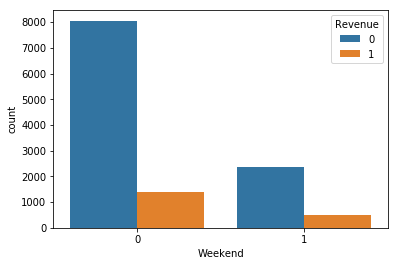

In [4]:
# Weekend
df['Weekend'] = df['Weekend'].astype(int)
sns.countplot(df['Weekend'], hue=df['Revenue'])

,VisitorType,Revenue
0,New_Visitor,0.249
1,Other,0.188
2,Returning_Visitor,0.139


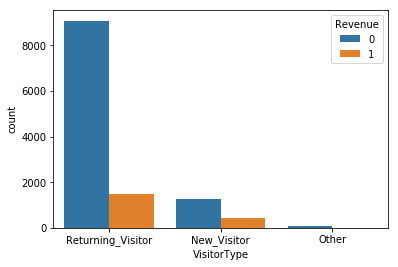

In [5]:
sns.countplot(df['VisitorType'], hue=df['Revenue'])
display(df[["VisitorType", "Revenue"]].groupby(['VisitorType'], as_index=False).mean().round(3))

In [6]:
from sklearn.preprocessing import LabelEncoder
 
le = LabelEncoder()
df['VisitorType'] = df['VisitorType'].apply(
    lambda x: ['Other', 'Returning_Visitor', 'New_Visitor'].index(x))
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,1,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,1,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,1,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,1,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,1,1,0


,Month,Revenue
0,Aug,0.176
1,Dec,0.125
2,Feb,0.016
3,Jul,0.153
4,June,0.101
5,Mar,0.101
6,May,0.109
7,Nov,0.254
8,Oct,0.209
9,Sep,0.192


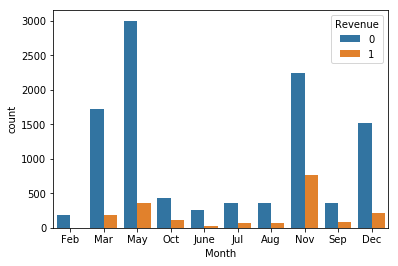

In [7]:
sns.countplot(df['Month'], hue=df['Revenue'])
display(df[["Month", "Revenue"]].groupby(['Month'], as_index=False).mean().round(3))

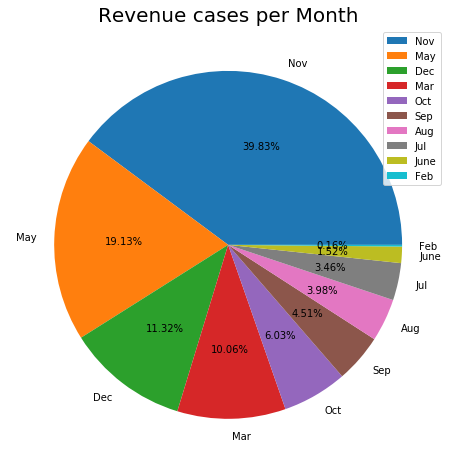

In [8]:
count = (df.loc[df.Revenue == 1, 'Month']).value_counts()
revenue_case = count.tolist()
month = count.index.tolist()

circle = plt.Circle((0, 0), 0.5)
plt.figure(figsize=(20, 8))
plt.pie(revenue_case, labels=month, autopct='%.2f%%')
plt.title('Revenue cases per Month', fontsize=20)
plt.legend()

In [9]:
df['Month'] = df['Month'].map(
    {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'June': 6,
    'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12 }
).astype(int)

In [10]:
# ProductRelated-ProductRelated_Duration vs Revenue
# from sklearn.preprocessing import MinMaxScaler
# mms = MinMaxScaler(feature_range=(0, 1))

# plot_np = mms.fit_transform(df[['ProductRelated', 'ProductRelated_Duration', 'Revenue']].to_numpy())
# plot_df = pd.DataFrame(plot_np, columns=['ProductRelated', 'ProductRelated_Duration', 'Revenue'])

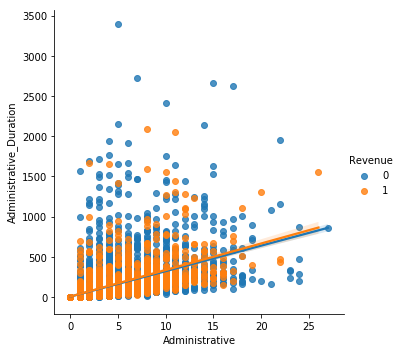

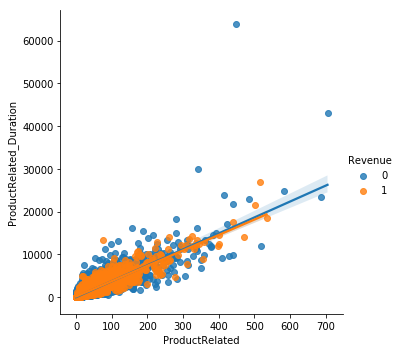

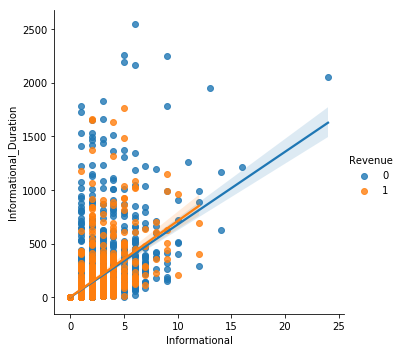

In [11]:
ad = sns.lmplot(x='Administrative', y='Administrative_Duration', hue='Revenue', data=df)
pr = sns.lmplot(x='ProductRelated', y='ProductRelated_Duration', hue='Revenue', data=df)
inf = sns.lmplot(x='Informational', y='Informational_Duration', hue='Revenue', data=df)

Text(0.5, 1.0, 'Informational_Duration')

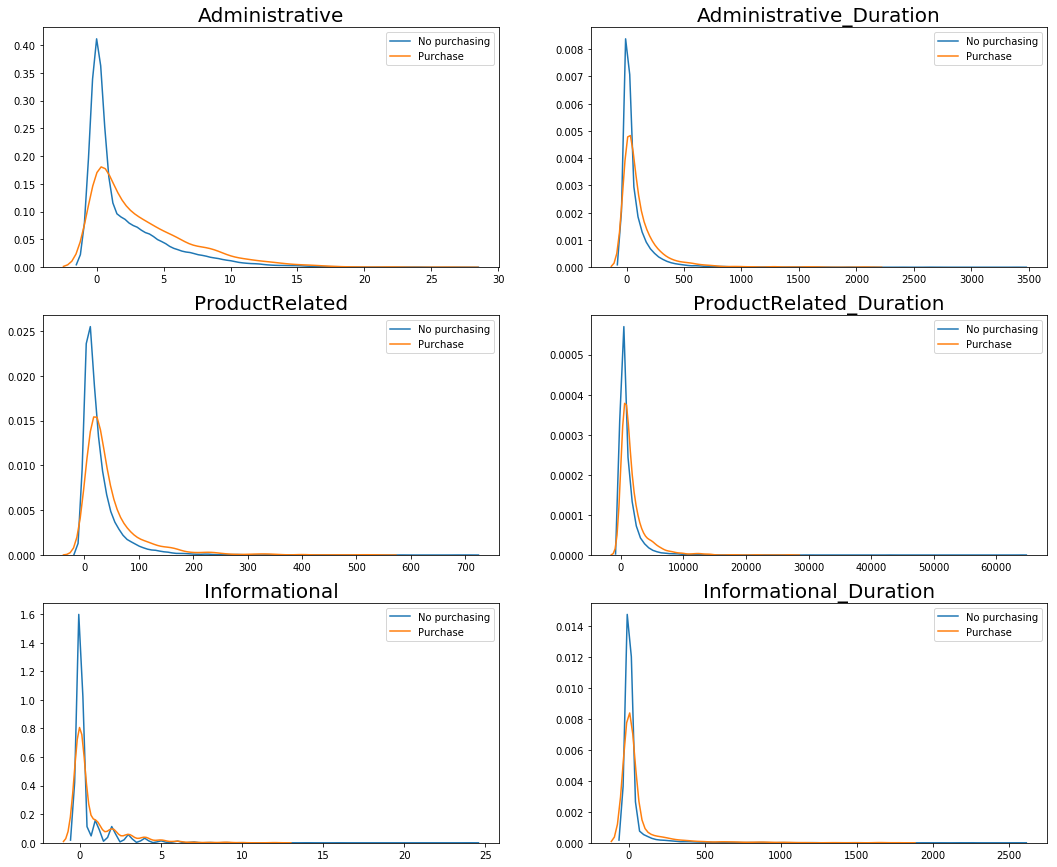

In [12]:
import matplotlib.pyplot as plt

fig, [[ax1, ax2], [ax3, ax4], [ax5, ax6]] = plt.subplots(3, 2)
fig.set_figwidth(18)
fig.set_figheight(15)
ax1 = sns.kdeplot(df.loc[df.Revenue == 0, 'Administrative'], label='No purchasing', ax=ax1)
ax1 = sns.kdeplot(df.loc[df.Revenue == 1, 'Administrative'], label='Purchase', ax=ax1) 
ax1.legend()
ax1.set_title('Administrative',fontsize = 20)

ax2 = sns.kdeplot(df.loc[df.Revenue == 0, 'Administrative_Duration'], label='No purchasing', ax=ax2)
ax2 = sns.kdeplot(df.loc[df.Revenue == 1, 'Administrative_Duration'], label='Purchase', ax=ax2) 
ax2.legend()
ax2.set_title('Administrative_Duration',fontsize = 20)


ax3 = sns.kdeplot(df.loc[df.Revenue == 0, 'ProductRelated'], label='No purchasing', ax=ax3)
ax3 = sns.kdeplot(df.loc[df.Revenue == 1, 'ProductRelated'], label='Purchase', ax=ax3) 
ax3.legend()
ax3.set_title('ProductRelated',fontsize = 20)

ax4 = sns.kdeplot(df.loc[df.Revenue == 0, 'ProductRelated_Duration'], label='No purchasing', ax=ax4)
ax4 = sns.kdeplot(df.loc[df.Revenue == 1, 'ProductRelated_Duration'], label='Purchase', ax=ax4) 
ax4.legend()
ax4.set_title('ProductRelated_Duration',fontsize = 20)


ax5 = sns.kdeplot(df.loc[df.Revenue == 0, 'Informational'], label='No purchasing', ax=ax5)
ax5 = sns.kdeplot(df.loc[df.Revenue == 1, 'Informational'], label='Purchase', ax=ax5) 
ax5.legend()
ax5.set_title('Informational',fontsize = 20)

ax6 = sns.kdeplot(df.loc[df.Revenue == 0, 'Informational_Duration'], label='No purchasing', ax=ax6)
ax6 = sns.kdeplot(df.loc[df.Revenue == 1, 'Informational_Duration'], label='Purchase', ax=ax6) 
ax6.legend()
ax6.set_title('Informational_Duration',fontsize = 20)

In [13]:
df['ProductRelated_Band'] = pd.cut(df['ProductRelated'], 6)
df[['ProductRelated_Band', 'Revenue']].groupby(['ProductRelated_Band'], as_index=False).mean().sort_values(by='Revenue', ascending=True)

,ProductRelated_Band,Revenue
5,"(587.5, 705.0]",0.000000
0,"(-0.705, 117.5]",0.146755
1,"(117.5, 235.0]",0.325581
3,"(352.5, 470.0]",0.333333
2,"(235.0, 352.5]",0.376812
4,"(470.0, 587.5]",0.500000


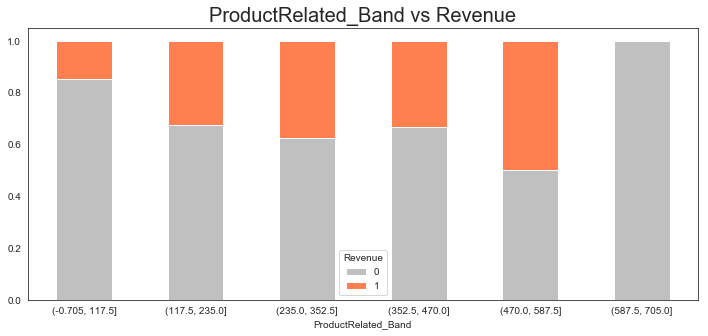

In [14]:
sns.set_style("white")
plot_df = pd.crosstab(df['ProductRelated_Band'], df['Revenue'])
plot_df.div(plot_df.sum(1).astype(float), axis = 0).plot(
    kind='bar', stacked=True, figsize=(12, 5), color=['silver', 'coral'])
plt.title('ProductRelated_Band vs Revenue', fontsize = 20)
plt.xticks(rotation='horizontal')
plt.show()

In [15]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
df['ProductRelated_Dur_Band'] = (df['ProductRelated_Duration']).map(lambda x : np.log10(x) if x > 0 else 0)

df['ProductRelated_Dur_Band'] = pd.cut(df['ProductRelated_Dur_Band'], 5)
df[['ProductRelated_Dur_Band', 'Revenue']].groupby(['ProductRelated_Dur_Band'], as_index=False).mean().sort_values(by='Revenue', ascending=True)

,ProductRelated_Dur_Band,Revenue
0,"(-0.306, 0.72]",0.017766
1,"(0.72, 1.742]",0.052851
2,"(1.742, 2.763]",0.101766
3,"(2.763, 3.785]",0.215977
4,"(3.785, 4.806]",0.336700


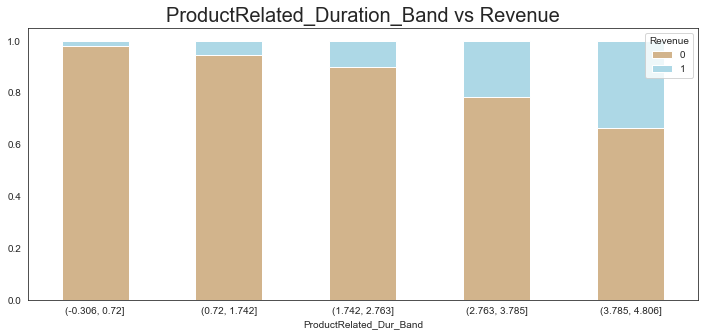

In [16]:
plot_df = pd.crosstab(df['ProductRelated_Dur_Band'], df['Revenue'])
plot_df.div(plot_df.sum(1).astype(float), axis = 0).plot(
    kind='bar', stacked=True, figsize=(12, 5), color=['tan', 'lightblue'])
plt.title('ProductRelated_Duration_Band vs Revenue', fontsize = 20)
plt.xticks(rotation='horizontal')
plt.show()

Text(0.5, 1.0, 'Administrative_Duration')

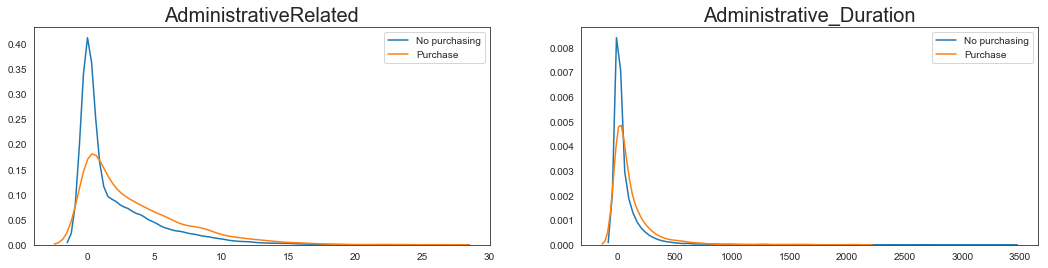

In [17]:
import matplotlib.pyplot as plt

fig, [ax1, ax2] = plt.subplots(1, 2)
fig.set_figwidth(18)
ax1 = sns.kdeplot(df.loc[df.Revenue == 0, 'Administrative'], label='No purchasing', ax=ax1)
ax1 = sns.kdeplot(df.loc[df.Revenue == 1, 'Administrative'], label='Purchase', ax=ax1) 
ax1.legend()
ax1.set_title('AdministrativeRelated',fontsize = 20)

ax2 = sns.kdeplot(df.loc[df.Revenue == 0, 'Administrative_Duration'], label='No purchasing', ax=ax2)
ax2 = sns.kdeplot(df.loc[df.Revenue == 1, 'Administrative_Duration'], label='Purchase', ax=ax2) 

ax2.legend()
ax2.set_title('Administrative_Duration',fontsize = 20)

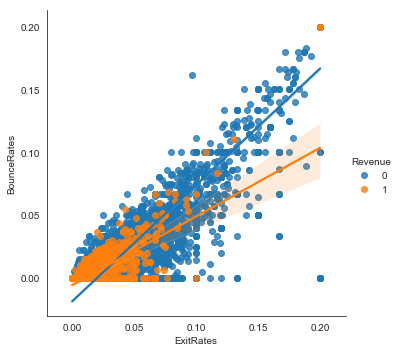

In [18]:
sns.lmplot(x="ExitRates", y="BounceRates",  hue="Revenue", data=df)

Text(0.5, 1.0, 'ExitRates')

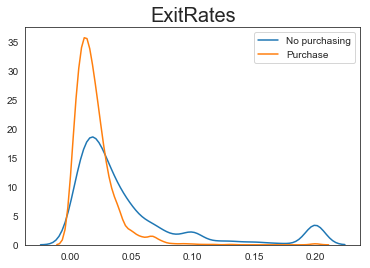

In [19]:
k = sns.kdeplot(df.loc[df.Revenue == 0, 'ExitRates'], label='No purchasing')
k = sns.kdeplot(df.loc[df.Revenue == 1, 'ExitRates'], label='Purchase')
k.legend()
k.set_title('ExitRates',fontsize = 20)

Text(0.5, 1.0, 'BounceRates')

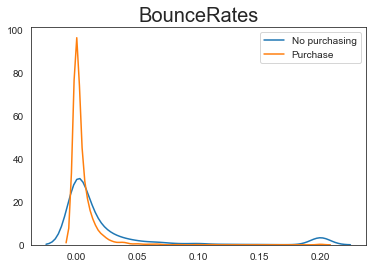

In [20]:
k = sns.kdeplot(df.loc[df.Revenue == 0, 'BounceRates'], label='No purchasing')
k = sns.kdeplot(df.loc[df.Revenue == 1, 'BounceRates'], label='Purchase')
k.legend()
k.set_title('BounceRates',fontsize = 20)

In [21]:
# ExitRate

df['ExitRates_Band'] = pd.cut(df['ExitRates'], 4)
df[['ExitRates_Band', 'Revenue']].groupby(['ExitRates_Band'], as_index=False).mean().sort_values(by='Revenue', ascending=True)

,ExitRates_Band,Revenue
3,"(0.15, 0.2]",0.003793
2,"(0.1, 0.15]",0.009346
1,"(0.05, 0.1]",0.043351
0,"(-0.0002, 0.05]",0.192199


Text(0.5, 1.0, 'SpecialDay')

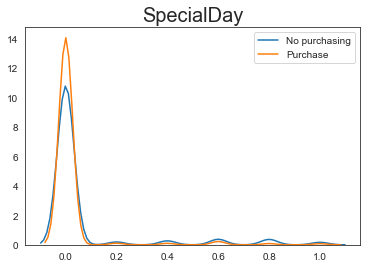

In [22]:
k = sns.kdeplot(df.loc[df.Revenue == 0, 'SpecialDay'], label='No purchasing')
k = sns.kdeplot(df.loc[df.Revenue == 1, 'SpecialDay'], label='Purchase')
k.legend()
k.set_title('SpecialDay',fontsize = 20)

In [23]:
# special day

df['SpecialDay_Band'] = pd.cut(df['SpecialDay'], 4)
df[['SpecialDay_Band', 'Revenue']].groupby(['SpecialDay_Band'], as_index=False).mean().sort_values(by='Revenue', ascending=True)

,SpecialDay_Band,Revenue
3,"(0.75, 1.0]",0.043841
1,"(0.25, 0.5]",0.053498
2,"(0.5, 0.75]",0.082621
0,"(-0.001, 0.25]",0.163898


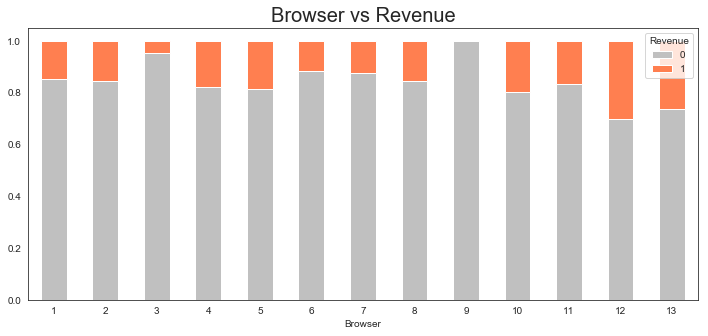

In [24]:
# Browser
plot_df = pd.crosstab(df['Browser'], df['Revenue'])
plot_df.div(plot_df.sum(1).astype(float), axis = 0).plot(
    kind='bar', stacked=True, figsize=(12, 5), color=['silver', 'coral'])
plt.title('Browser vs Revenue', fontsize = 20)
plt.xticks(rotation='horizontal')
plt.show()

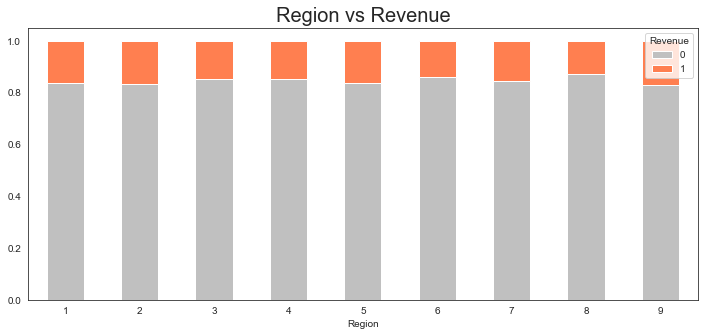

In [25]:
# Region
plot_df = pd.crosstab(df['Region'], df['Revenue'])
plot_df.div(plot_df.sum(1).astype(float), axis = 0).plot(
    kind='bar', stacked=True, figsize=(12, 5), color=['silver', 'coral'])
plt.title('Region vs Revenue', fontsize = 20)
plt.xticks(rotation='horizontal')
plt.show()

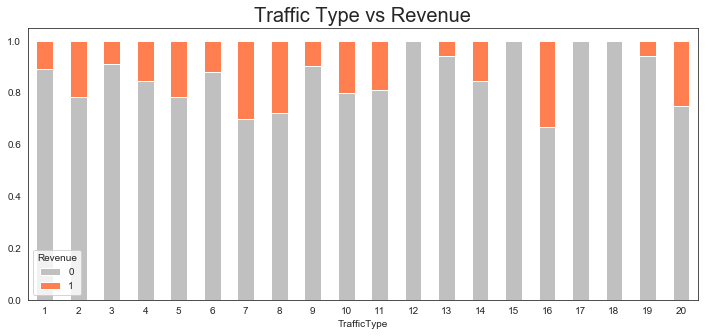

In [26]:
# Traffic type
plot_df = pd.crosstab(df['TrafficType'], df['Revenue'])
plot_df.div(plot_df.sum(1).astype(float), axis = 0).plot(
    kind='bar', stacked=True, figsize=(12, 5), color=['silver', 'coral'])
plt.title('Traffic Type vs Revenue', fontsize = 20)
plt.xticks(rotation='horizontal')
plt.show()

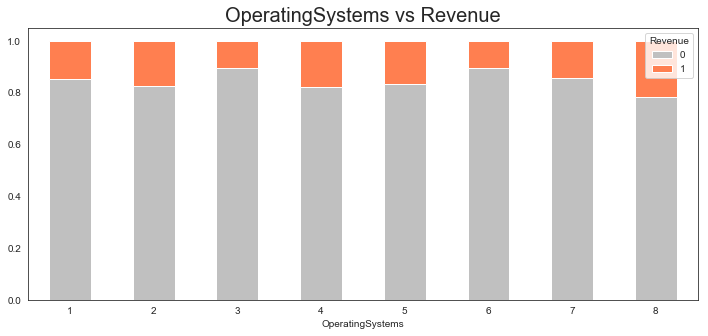

In [27]:
# Operating System
plot_df = pd.crosstab(df['OperatingSystems'], df['Revenue'])
plot_df.div(plot_df.sum(1).astype(float), axis = 0).plot(
    kind='bar', stacked=True, figsize=(12, 5), color=['silver', 'coral'])
plt.title('OperatingSystems vs Revenue', fontsize = 20)
plt.xticks(rotation='horizontal')
plt.show()

### Correlation

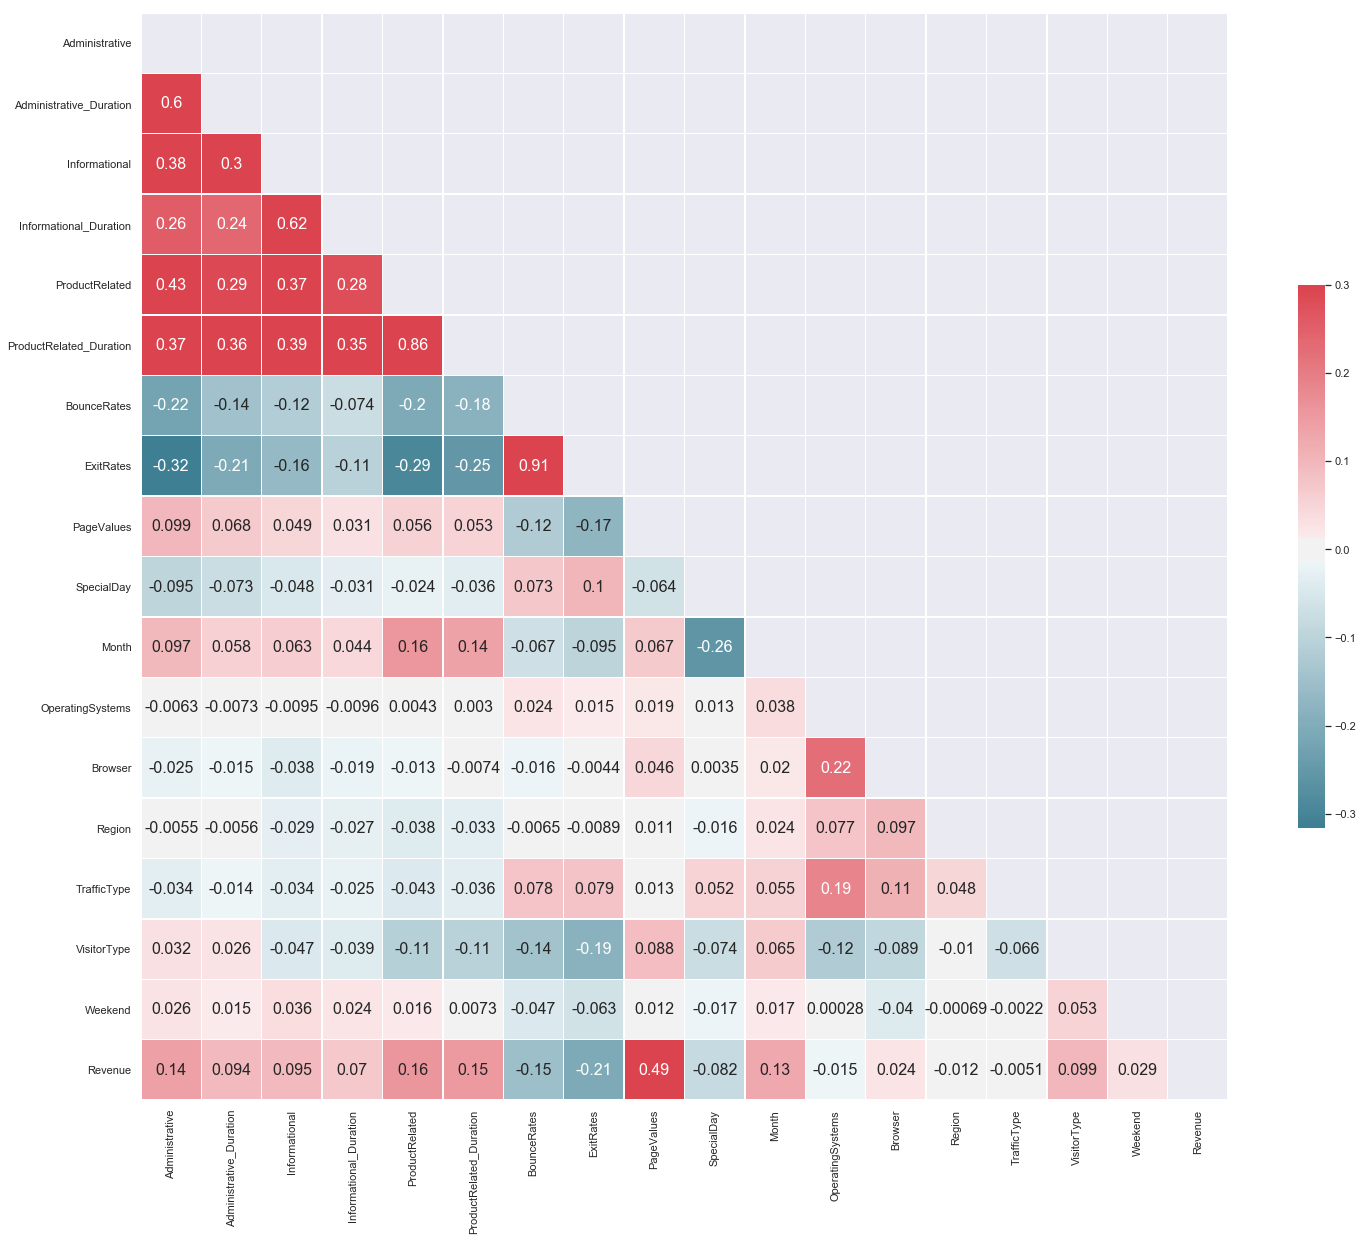

In [28]:
correlation_mat = df.corr()

sns.set(style="dark")

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_mat, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(25, 20))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_mat, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, annot_kws={"size": 16})
# sns.heatmap(df_cm, cmap="Greens", annot=True,annot_kws={"size": 16})# font size

In [29]:
# sns.boxplot(y='Administrative_Duration', x='Administrative', hue='Revenue',
#             data=df, orient='h',palette="Set3")
# pd.pivot_table(
#     df,values=['Administrative'], index=['Administrative_Duration'], columns= ['Revenue'],
#     aggfunc = 'median').round(3)

### Define Features

In [30]:
scale_features = [
            'PageValues', 'Administrative', 
            'ProductRelated', 'ProductRelated_Duration','BounceRates',
            'Month',
            'ExitRates', #'SpecialDay',
            'Weekend'
           ]

features = [
            'PageValues', 'Administrative', 
            'ProductRelated', 'ProductRelated_Duration','BounceRates',
            'Month',
            'ExitRates', #'SpecialDay',
            'Weekend'
           ]

df_x = df[features]
df_y = df['Revenue']

# 82 84 84 82 withourt minmax scaler
# scaler = MinMaxScaler(feature_range=(0, 1))
# dataset_numpy = scaler.fit_transform(df[scale_features].to_numpy())
# df[scale_features] = pd.DataFrame(dataset_numpy, columns=scale_features)

### Define train and valid set

In [31]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neural_network import MLPClassifier

def getModel(classifier):
    
    clf1 = RandomForestClassifier(
#         n_estimators=250,
#         max_depth=10,
#         min_samples_split=2,
#         criterion='entropy',
#         min_weight_fraction_leaf=0.01,
        random_state=2000)

#     clf2 = SVC(C=70, kernel='rbf', gamma=0.4, random_state=2000)
    clf2 = SVC(random_state=2000)

        
    clf3 = MLPClassifier(#max_iter=1000,
                         random_state=2000)

#     clf4 = SGDClassifier(max_iter=1000)
    
    if(classifier == 'Random Forest Classifier'):
        return clf1
    elif(classifier == 'Support Vector Machine'):
        return clf2
    elif(classifier == 'MLP Classifier'):
        return clf3
#     elif(classifier == 'SGD Classifier'):
#         return clf4
    
#     elif(classifier == 'Voting Classifier'):   
#         model = VotingClassifier(   # 0.806
#             estimators=[('rf', clf1), ('svc', clf2), ('lr', clf3)], voting='hard') 
#         return model

In [32]:
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC
from sklearn import metrics

model_name = [
    'Random Forest Classifier',
    'Support Vector Machine',
    'MLP Classifier']

for i in range(len(model_name)):

    model = getModel(model_name[i])

    train_acc_list = []
    test_acc_list = []

    # 5 Cross Validation - separate to training set and test set
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=888)
    for train_idx, test_idx in kfold.split(df_x, df_y):
        train_x, test_x = df_x.iloc[train_idx], df_x.iloc[test_idx]
        train_y, test_y = df_y.iloc[train_idx], df_y.iloc[test_idx]

        model.fit(train_x, train_y)

        train_pred_y = model.predict(train_x)
        train_acc = metrics.accuracy_score(train_y, train_pred_y)
        test_pred_y = model.predict(test_x)
        test_acc = metrics.accuracy_score(test_y, test_pred_y)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

    print(model_name[i] + ':')
    print('  Average train accuracy: {}'.format(np.mean(train_acc_list)))
    print('  Average validation accuracy: {}\n'.format(np.mean(test_acc_list)))

Random Forest Classifier:
  Average train accuracy: 0.9998580697485806
  Average validation accuracy: 0.9018653690186536

Support Vector Machine:
  Average train accuracy: 0.848073803730738
  Average validation accuracy: 0.8472830494728306

MLP Classifier:
  Average train accuracy: 0.8799270072992702
  Average validation accuracy: 0.878588807785888



In [33]:
# from sklearn.model_selection import train_test_split
# x_train, x_test, y_train, y_test = train_test_split(
#     df_x, df_y, test_size = 0.2, shuffle=True)

# ### Define Dataset and Dataloader

# from torch.utils.data import Dataset

# class MyDataset(Dataset):            
#     def __init__(self, x, y):
#         self.x = x
#         self.y = y
        
#     def __len__(self):
#         return len(self.x)
    
#     def __getitem__(self, index):
#         return (torch.tensor(self.x.values[index]), torch.FloatTensor([self.y.values[index]]))

# train_dataset = MyDataset(x_train, y_train)

# from torch.utils.data import DataLoader

# batch_size = 3

# train_data_loader = DataLoader(
#     train_dataset,
#     batch_size=batch_size
# )

# ### Train Model
# #### Define Model

# import torch
# import torch.nn as nn
# import torch.nn.functional as F

# class Net(nn.Module):
    
#     def __init__(self):
#         super(Net, self).__init__()
#         self.layer1 = nn.Linear(in_features=len(features), out_features=15)
#         self.layer2 = nn.Linear(in_features=15, out_features=15)
#         self.layer3 = nn.Linear(in_features=15, out_features=15)
#         self.layer4 = nn.Linear(in_features=15, out_features=1)
        
#     def forward(self, batch_x):
#         x = self.layer1(batch_x)
#         x = F.relu(x)
#         x = self.layer2(x)
#         x = F.relu(x)
#         x = self.layer3(x)
#         x = F.relu(x)
#         x = self.layer4(x)
#         return x
    
# model = Net()
# criterion = nn.BCEWithLogitsLoss() # to satisfy: loss = criterion(pred_y, dummy_y)   # multi-target not support
# optimizer = SGD( model.parameters(), lr=0.01)

# #### Training and validation

# n_epoch = 5
# loss_list = []

# for epoch in range(n_epoch):
#     epoch_loss = 0
#     epoch_acc = 0
#     for batch_x, batch_y in train_data_loader:
#         dummy_y = batch_y.float()
#         dummy_y = dummy_y.view(-1, 1)
#         optimizer.zero_grad()

        
#         pred_y = model(batch_x.float())

#         # Forward and backward passes
#         loss = criterion(pred_y, dummy_y)   # multi-target not support
        
#         loss.backward()
#         optimizer.step()
        
#         epoch_loss += loss.item()
#         acc = ((pred_y > 0.5).float() == batch_y).float().mean()
#         epoch_acc += acc
        
        
#     print("Epoch {:2d}, loss {:6f}, Train Accuracy {}".format(
#         epoch+1, epoch_loss / len(train_data_loader), epoch_acc.item() / len(train_data_loader)
#     ))

# # validation accuracy
# pred_y = model(torch.tensor(x_test.values).float())
# y_test = torch.FloatTensor(y_test.values).view(-1, 1)
# correct = ((pred_y > 0.5) == y_test).sum().item()
# print("Accuracy {}".format(correct / len(y_test)))